In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

## Apertura de base de datos

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
df.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [4]:
np.unique(df.isFraud, return_counts=True)

(array([0, 1], dtype=int64), array([6354407,    8213], dtype=int64))

Podemos observar que la base de datos esta desbalanceada, dado que la no existencia de fraude es más común que el fraude.

## Preparación de la base de datos

Las columnas nameOrig y nameDest no aportan información relevante, por lo que serán eliminadas.

In [5]:
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)

Se considera que la mejor forma de aprovechar la información de la columna type es con la creación de one hot encoding, por lo que se crearan dummy columns.

In [6]:
np.unique(df.type, return_counts=True)

(array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
       dtype=object),
 array([1399284, 2237500,   41432, 2151495,  532909], dtype=int64))

In [7]:
one_hot = pd.get_dummies(df['type'])
df = df.drop('type',axis = 1)
df = df.join(one_hot)
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT',
       'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype='object')

Separar la variable objetivo de las variables independientes.

In [8]:
y=np.array(df.isFraud)
df.drop('isFraud', axis=1, inplace=True)
X=np.array(df)

## Creando base de datos de entrenamiento y de testeo

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Aplicando underfiting a la base de datos

A partir de pruebas realizadas a los modelos se determinó que el método más eficiente de preprocesamiento es aquel que logra el balance de las diferentes categorías en la base de datos. En este paso se eliminan casos que no fueron fraude de la base de datos, para que el modelo entrene con la misma cantidad de casos de entrenamiento y de testeo.

In [11]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

X_train, y_train = undersample.fit_resample(X_train, y_train)

## Entrenamiento de modelos

### regresión logística

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_predicciones=lr.predict(X_test)

c:\Users\joaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Valores reales')

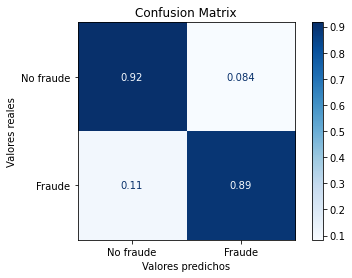

In [14]:
from sklearn.metrics import plot_confusion_matrix #for normalize confusion matrix
cmd = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=['No fraude' ,'Fraude'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')

### Árbol de decisión

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dt_predicciones=dt.predict(X_test)

c:\Users\joaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Valores reales')

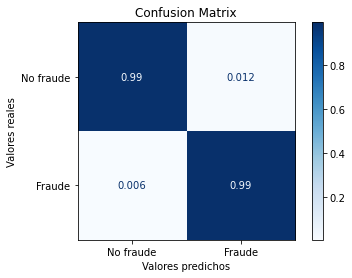

In [17]:
from sklearn.metrics import plot_confusion_matrix #for normalize confusion matrix
cmd = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=['No fraude' ,'Fraude'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')

### random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_predicciones=rf.predict(X_test)

c:\Users\joaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Valores reales')

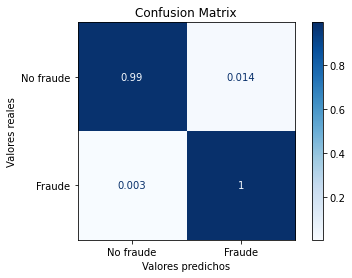

In [20]:
from sklearn.metrics import plot_confusion_matrix #for normalize confusion matrix
cmd = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=['No fraude' ,'Fraude'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')

### support vector machine

In [21]:
from sklearn import svm
svm_c = svm.SVC(random_state=0).fit(X_train, y_train)
svm_c_predicciones=svm_c.predict(X_test)

c:\Users\joaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Valores reales')

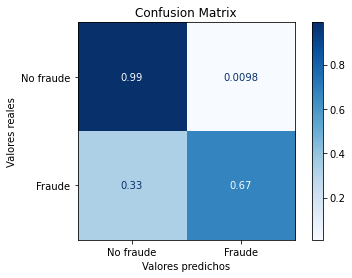

In [23]:
from sklearn.metrics import plot_confusion_matrix #for normalize confusion matrix
cmd = plot_confusion_matrix(svm_c, X_test, y_test,
                                 display_labels=['No fraude' ,'Fraude'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')

A partir del desempeño de los modelos se determina que la arquitectura de random forest es la mas apropiada para este problema.